# **Overview**
---
Bangkok is the most-searched Thai destination for the annual water festival, followed by Pattaya, Chiang Mai, Krabi, and Phuket, according to Amanpreet Bajaj, Airbnb’s general manager for South-East Asia, India, Hong Kong, and Taiwan. Data from the Tourism and Sports Ministry shows that over 2.14 million foreign tourists visited Thailand in January 2023, a huge 1,500% increase from 133,828 in the same month the previous year.

Airbnb is becoming more popular as an alternative accommodation choice for tourists in Bangkok, offering a wide range of options from affordable rooms to luxury apartments. This flexibility and the unique experiences provided by Airbnb make it an attractive option compared to traditional hotels. According to Thestar.com, the number of nights booked on Airbnb in Thailand more than doubled last year, mainly due to international travel. Group travel on Airbnb in Thailand increased by over 300% in 2022 compared to the previous year, indicating a trend of people traveling to reconnect with loved ones. Family travel on Airbnb grew by 60% in 2022 compared to pre-pandemic levels, as more families chose Airbnb for its value and space.

Additionally, Airbnb travelers are staying longer in Thailand. In 2022, the average length of stay for Airbnb users was five nights, and long-term stays of over 28 days more than tripled compared to 2021.

source : https://www.thestar.com.my/aseanplus/aseanplus-news/2023/03/26/airbnb-sees-surge-in-tourists-visiting-bangkok-for-worlds-largest-water-fight

# **Stakeholder**

The key stakeholders in this analysis are Airbnb's business and marketing teams. The business team will use the analysis results to understand the profile of Airbnb listings in Bangkok. Meanwhile, the marketing team will use the insights gained to design more effective marketing strategies.

# **Problem Statement**
---
**Analysis Distribution of Airbnb Listing Locations**:
1. What is the total number of Airbnb listings in Bangkok?
2. What is the distribution of Airbnb listings in Bangkok? Is the distribution of Airbnb listings even?


**Factors Influencing the Price of Airbnb Listings**:
1. Are there any factors that affect the prices of Airbnb listings?
2. Do Airbnb listings vary in price depending on where you live in Bangkok?


**The preferences of Room Type** :
1. What are the user preferences regarding the types of rooms available on Airbnb in Bangkok?


**Airbnb Listing Popularity Analysis** :
1. What is the proportion of popularity of Airbnb listings in Bangkok?
2. Does the level of popularity of an Airbnb listing correlate with the price?

# **Purpose of Analysis**
---
This analysis can help the company expand and increase sales next year. It will help AirBnb Business & Marketing determine the best locations and improve the quality of listings in each region. The things that must be analyzed are:

1. It shows how many Airbnb listings there are in Bangkok and where they are.

2. By looking at things like location, room type, minimum number of nights, and number of reviews, we can see which factors affect the price of Airbnb properties. Understanding these factors helps stakeholders adjust pricing and marketing strategies.

3. With a good understanding of room types, business teams can optimize their Airbnb listings, while marketing teams can design more effective marketing strategies.

4. This analysis will show what people like and what properties attract the most visitors in Bangkok.

# **Dataset: Airbnb Listing Bangkok**
---
* listing_id: Identifier - Unique identifier for each listing/room registration.
* listing_name: Identifier - Description of the name for each listing/room registration.
* host_id: Identifier - Unique identifier for each host.
* host_name: Identifier - Name of each host, typically just the first name.
* neighbourhood: Categorical - Neighbourhood is the district name in Bangkok City.
* latitude: Coordinate - Point on the Latitude line for location projection.
* longitude: Coordinate - Point on the Longitude line for location projection.
* room_type: Categorical - Type of room being rented: entire home/apt, private room, shared room, or hotel.
* price: Numerical - Daily price in the local currency.
* minimum_nights: Numerical - Minimum number of nights for the place.
* number_of_reviews: Numerical - Number of reviews each listing has.
* last_review: Date - Date of the latest review.
* reviews_per_month: Numerical - Average number of reviews per month.
* calculated_host_listings_count: Numerical - Number of listings the host currently owns in city/region geography.
* availability_365: Numerical - Availability of the listing for x days in the future. Note that a place may be available because it has been booked by a guest or blocked by the host.
* number_of_reviews_ltm: Numerical - Number of reviews each listing has (in the last 12 months).

# 1. Data Preparation: Reading & Load Data

In [1]:
# import relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from scipy.stats import kstest, shapiro, normaltest
from statsmodels.stats.diagnostic import lilliefors
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading Data
df = pd.read_csv("Airbnb Listings Bangkok.csv", index_col=0)

In [3]:
# data preview 
display(df.head(), df.tail())

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0
15853,790476492384199044,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.752960,100.540820,Private room,1214,1,0,NaN,NaN,14,365,0


In [4]:
# general info on data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               10064

In [5]:
# Display the number of rows and columns in the DataFrame
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 15854
Number of columns: 16


In [6]:
# Rename the columns 'id' to 'listing_id' and 'name' to 'listing_name'
df.rename(columns={'id': 'listing_id', 'name': 'listing_name'}, inplace=True)

In [7]:
# construct deep Info on columns & values:
bangkokairbnb = []
for i in df.columns:
    bangkokairbnb.append([i, 
                        df[i].dtypes,
                        df[i].isna().sum(),
                        round((((df[i].isna().sum())/(len(df)))*100),2), 
                        df[i].nunique()])
pd.DataFrame(bangkokairbnb, columns = ['dataFeatures', 'dataType', 'null', 'null%', 'unique'])

,dataFeatures,dataType,null,null%,unique
0,listing_id,int64,0,0.00,15854
1,listing_name,object,8,0.05,14794
2,host_id,int64,0,0.00,6659
3,host_name,object,1,0.01,5312
4,neighbourhood,object,0,0.00,50
5,latitude,float64,0,0.00,9606
6,longitude,float64,0,0.00,10224
7,room_type,object,0,0.00,4
8,price,int64,0,0.00,3040
9,minimum_nights,int64,0,0.00,86


In [8]:
# Display the summary statistics for numerical columns
display(df.describe())

# Display the summary statistics for object (string) columns
display(df.describe(include='object'))

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,listing_name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


# 2. Data Cleaning

### **Overview**:
- 2.1 Drop Duplicate rows
- 2.2 Cleaning Null Values
    - Substitute null values if appropriate data are available 
    - Drop null values if appropriate data not available 
    - Null values in `listing_name` column 
    - Null values in `host_name` column 
    - Null values in `last_review` column  
    - Null values in `review_per_month` column
- 2.3 Finding & Fixing Data Anomalies
- 2.4 Check Distribution in Numerical Columns and Observe

## 2.1 Dropping Duplicate Rows

In [9]:
# check for duplicates
duplicate_rows = df[df.duplicated(subset=['listing_name','longitude', 'latitude', 'price', 'last_review'])]
duplicate_rows

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.762790,100.497900,Private room,1400,1,0,NaN,NaN,9,361,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.920720,100.575780,Shared room,350,1,0,NaN,NaN,4,180,0
15121,767128654727724698,Sathon Luxury Loft/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaN,NaN,13,339,0
15144,767945912006659422,Sathon Luxury Loft/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,1580,1,0,NaN,NaN,40,339,0
15186,765691389894680033,Sathon Luxury 2 br/China Town/Icon Siam,264864968,Tricia,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,44,340,0
15190,765716244664642439,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,40,340,0
15191,765721954905526928,Sathon Luxury 2 br/China Town/Icon Siam,344327171,Alice,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,40,340,0
15192,765728211212001811,Sathon Luxury 2 br/China Town/Icon Siam,276781306,Alex,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,13,340,0
15195,765781484209218358,Sathon Luxury 2 br/China Town/Icon Siam,20133201,Willam,Sathon,13.710777,100.519891,Entire home/apt,2221,1,0,NaN,NaN,33,340,0
15371,775777794097427183,New! Gateway/ Bangkok University 1BR 2PPL near...,52161947,Noons,Khlong Toei,13.716669,100.584967,Entire home/apt,2976,1,0,NaN,NaN,99,362,0


In [10]:
# check duplicated data
df[df['listing_name']=='small1']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6728,31678264,small1,97598307,Soo,Don Mueang,13.91507,100.58584,Shared room,350,1,0,NaN,NaN,4,180,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,NaN,NaN,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,NaN,NaN,4,180,0


In [11]:
df[df['host_name']=='Soo']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6728,31678264,small1,97598307,Soo,Don Mueang,13.91507,100.58584,Shared room,350,1,0,NaN,NaN,4,180,0
6744,31679152,small2,97598307,Soo,Don Mueang,13.91525,100.58530,Private room,1200,1,0,NaN,NaN,4,180,0
8789,37953702,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,NaN,NaN,4,180,0
8790,37954129,small1,97598307,Soo,Don Mueang,13.92072,100.57578,Shared room,350,1,0,NaN,NaN,4,180,0


In [12]:
df[df['listing_name']=='NA BANGLAMPOO GUEST HOUSE']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,NaN,NaN,9,361,0
5892,28832370,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76162,100.49768,Private room,750,1,16,2020-02-18,0.32,9,360,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,NaN,NaN,9,361,0


In [13]:
df[df['host_name']=='Yui']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3986,21428881,NA BANGLAMPOO GUEST HOUSE 2,87704107,Yui,Phra Nakhon,13.76181,100.49843,Private room,750,1,18,2019-06-04,0.29,9,361,0
4095,21543925,Na Banglampoo Hotel,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,750,1,123,2020-03-05,2.09,9,354,0
5796,28527394,NA BANGLAMPOO GUEST HOUSE 4,87704107,Yui,Phra Nakhon,13.76377,100.49736,Private room,750,1,2,2019-01-05,0.04,9,361,0
5881,28629395,NA BANGLAMPOO GUEST HOUSE3,87704107,Yui,Phra Nakhon,13.76196,100.49732,Private room,750,1,14,2020-01-02,0.27,9,361,0
5884,29052072,Na Banglampoo Guest House 5,87704107,Yui,Phra Nakhon,13.76359,100.49907,Private room,750,1,2,2019-05-02,0.04,9,361,0
5890,28831409,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,NaN,NaN,9,361,0
5891,28832006,Na Banglampoo guest house,87704107,Yui,Phra Nakhon,13.76331,100.49695,Private room,750,1,8,2019-10-21,0.16,9,357,0
5892,28832370,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76162,100.49768,Private room,750,1,16,2020-02-18,0.32,9,360,0
5976,28907857,NA BANGLAMPOO GUEST HOUSE,87704107,Yui,Phra Nakhon,13.76279,100.49790,Private room,1400,1,0,NaN,NaN,9,361,0


> Duplicate data is exactly the same data. However, if it is considered duplicate data and deleted, the calculated listing of the host is reduced and does not match. So the assumption is that the host has the same price listing in a building. 

## 2.2 Cleaning Null Values

**Null values in `listing_name` column**

In [14]:
df[df['listing_name'].isna()]

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


> At first, I looked into the columns with missing data in the dataset. In the 'listing_name' column, I spotted an entry with a host named Pakaphol. By checking the 'calculated_host_listings_count' column, I saw that this host had another listing elsewhere. I found another entry with the same host name and listing: Errday Guest House. So, I replaced the missing values in the 'listing_name' column with 'Errday Guest House'.

In [15]:
df[df['host_name']=='Pakaphol']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [16]:
df.loc[2075,'listing_name'] = 'Errday Guest House'
df.loc[2075,'listing_name']

'Errday Guest House'

> There are 7 missing values in the listing_name column now. This shouldn't happen as listing_name is mandatory when a host lists a property on Airbnb. I will fill these based on the room type and district name to generally describe the property

In [17]:
# Function to fill empty data in the listing_name column
def fill_listing_name(col):
    if pd.isnull(col['listing_name']):
        return f"{col['room_type']} at {col['neighbourhood']} Bangkok"
    else:
        return col['listing_name']

# Filling empty listing_name data using the above function
df['listing_name'] = df.apply(fill_listing_name, axis=1)

In [18]:
df['listing_name'].isna().sum()

0

**Null values in `host_name` column**

In [19]:
# Check for data with missing values in the host_name column
df[df['host_name'].isna()]

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


> For `calculated_host_listings_count` = 1, it means there's only one listing for `host_id` = 137488762. Since we can't fill it based on host_id, and there are reviews already, we'll use a generic name like 'Bangkok Host'

In [20]:
# filling empty host_name
df['host_name'].fillna(value='Bangkok Host', inplace=True)

**Null values in `review_per_month`**

> Since the number of empty values is the same, identify if all the empty values in last_review and reviews_per_month are in the same index.

In [21]:
# Printing whether null values in 'reviews_per_month' have the same index as 'last_review'
are_nulls_same_index = df['reviews_per_month'].isna().all() == df['last_review'].isna().all()
print("Do null values in 'reviews_per_month' have the same index as 'last_review'?", are_nulls_same_index)


Do null values in 'reviews_per_month' have the same index as 'last_review'? True


> There are 5790 empty entries in both the 'last_review' and 'reviews_per_month' columns. We have three columns related to reviews: 'number_of_reviews', 'last_review', and 'reviews_per_month'. Next, we will check whether the 'number_of_reviews' column is correlated with the column containing missing values

In [22]:
# Check the number of columns in number_of_reviews containing a value of 0
len(df[df['number_of_reviews']==0])

5790

In [23]:
# Check the correlation of 0 values in the 'number_of_reviews' column with the 2 columns that have missing values
len(df[(df['number_of_reviews']==0) & (df['last_review'].isna()) & (df['reviews_per_month'].isna())])

5790

> We found that the number of entries with a value of 0 in the 'number_of_reviews' column is 5790, which is the same as the number of empty entries in the 'last_review' and 'reviews_per_month' columns.

> Based on the previous results, we will fill the 'reviews_per_month' column with 0 because there are no reviews yet. In the last_review column because it is a date, we don't know when a visitor wrote a review on the property listing. Since we also don't use the column in our analysis, we will delete the column.

In [24]:
# filling mising value in reviews
df['reviews_per_month'].fillna(value=0,inplace=True)

In [25]:
# remove last review column
df.drop(columns=['last_review'],inplace=True)

In [26]:
# recheck all missing values in dataset
df.isna().sum()

listing_id                        0
listing_name                      0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## 2.3 Finding & Fixing Data Anomalies

**0 THB as minimum values on `price` column**

In [27]:
# find the listing wtih 0 price 
df[df['price']==0]

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
11103,44563108,Somerset Maison Asoke Bangkok,360620448,Somerset Maison Asoke,Vadhana,13.73815,100.5642,Hotel room,0,1,0,0.0,1,0,0


> It doesn't make sense to include listings that are priced at 0 THB.
Since there's only one entry with a price of 0 in the 'price' column, removing that row wouldn't significantly affect or skew the dataset.

In [28]:
# drop 0 values on price column
df = df.drop(df[df['price']==0].index)

**Value of nights on `minimum_nights` and `availablity_365` columns**

In [29]:
# Check the rows where the minimum_nights column has a value greater than 1 year / 365 days
df[df['minimum_nights'] > 365].sort_values(by='number_of_reviews', ascending=False).head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2.61,3,0,0
1592,10709131,"34Fl 2, M Ladprao Condo,MRT & Malls",32398198,Touchapon,Chatu Chak,13.81699,100.56292,Entire home/apt,760,700,61,0.73,2,364,0
324,2489610,NEW 65Sqm 2BD 2BR Sukhumvit26 Emquartier Emporium,12743033,Thanan,Khlong Toei,13.72699,100.56988,Entire home/apt,2043,370,23,0.23,2,365,0
1200,8801560,"30th floor, 10 min to BTS, Seaview",4517723,Kannicha,Bang Na,13.66417,100.64955,Entire home/apt,35000,998,20,0.26,7,365,5
4194,22059876,C,160989331,Annchalee,Thon buri,13.71693,100.48330,Private room,161516,500,3,0.05,1,0,0


In [30]:
# Check the rows where the availability_365 column has a value of 0
df[df['availability_365'] == 0].sort_values(by='number_of_reviews', ascending=False).head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
623,6033632,The Mustang Nero/No.2 Black Bird,30963587,Themustang,Khlong Toei,13.71136,100.59217,Hotel room,2000,1,426,4.65,10,0,0
1499,10500566,WOW!!! Just 1min walk to BTS OnNut,54134220,Kittipong,Phra Khanong,13.70482,100.60292,Entire home/apt,1039,28,309,3.67,3,0,0
61,1041976,Long-stay special rate spacious entire floor Siam,5735895,Pariya,Parthum Wan,13.74814,100.52016,Entire home/apt,2900,1125,295,2.61,3,0,0
3109,17561011,2BR/wifi/1 min to BTS On nut/提供中文服务,44411390,Jeff,Khlong Toei,13.70396,100.59967,Entire home/apt,1800,1,218,3.20,1,0,0
1456,9835713,Silom 3 apartment no. 2 (BTS Saladaeng station),26736483,K,Bang Rak,13.72550,100.53019,Entire home/apt,954,1,171,2.00,89,0,7



> Based on the findings regarding anomalies in the availability_365 and minimum_nights columns, we can conclude:

- minimum_nights:
Properties can have minimum stays exceeding 1 year. For instance, one listing has 295 reviews with a minimum stay of 1125 days.
Airbnb allows bookings over a year with monthly payments (https://www.airbnb.co.id/help/article/2584).
- Availability_365:
A value of 0 is possible. For example, a listing with 426 reviews might have been rented out for over a year when the data was collected.

> In summary, these anomalies are realistic within the context of Airbnb operations, so there is no need to remove these rows from the dataset.





**Others Anomalies**

In [31]:
# check the unique values in dataset
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                    data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,listing_id,15853,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254, 62217, 1791481, 66046, 105042, 1793000, 960858, 113744, 965722, 1808600, 118118, 1816517, 969792, 121410, 145343, 973830, 156583, 1823321, 159854, 976690, 978531, 166267, 169285, 978969, 1842066, 169514, 1849029, 1862089, 985743, 988373, 172332, 1016487, 1862331, 1862377, 185364, 1887544, 1888303, 1019241, 241416, 1026451, 1028469, 1028486, 1035589, 1035640, 1897982, 296960, 1898332, 1041976, 313459, 1052180, 1926489, 320014, 1933894, 1057173, 1060320, 384924, 1067748, 1077493, 1943048, 385130, 385278, 385979, 390611, 1947314, 1079039, 1086843, 393066, 397449, 405662, 1088343, 1094136, 1961981, 407381, 1975849, 1133843, 413824, 428360, 428421, 428907, 428950, 430691, 430703, 430706, 432004, 439051, 1138679, ...]"
1,listing_name,14799,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one bedroom at The Kris Condo Bldg. 3, Suite Room 3 at MetroPoint, NEw Pro!! Bungalow Bkk Centre, Condo with Chaopraya River View, 1 chic bedroom apartment in BKK, Batcave, Pool view, near Chatuchak, Standard Room Decor do Hostel, Sathorn Terrace Apartment(61), 2BR apt in a cozy neighborhood, Comfy bedroom near River pier & BTS Taksin., budget hotel bangkok near subway, Deluxe Condo, Nana, Pool/GYM/Sauna, Luxury@swimpool/FreeWiFi/nearJJMkt, Nice and Quiet condo near BTS Onnut, 24Flr- 1br Apt near JJ, MRT, BTS, Central Bangkok 3 Bedroom Apartment, The Duplex - Asoke- Luxury 92sqm, New, Stylish & Luxury Studio Condo, River View - Ivy Condo (1 Bedroom), Siamese Gioia on Sukhumvit 31, Contemporary Modern Duplex-Thong Lo, Pan Dao Condo 5 min from BTS On Nut, 1 BR condominium center BKK +NETFLIX+55SQM, 1 penthouse in central Bangkok, MetroPoint Suite Room, Near Airport, Boutique Rooms Near Bangkok Airport, BangLuang House1 @ Bangkok Thailand, Studio near Chula University/Silom walk to MRT/BTS, กรองทองแมนชั่น (ลาดพร้าว 81), Deluxe one Bedroom Condo w.Pool-GYM & Sauna 8-7, Beautiful 1 BR apartment @BTS Ari, Urban Oasis in the heart of Bangkok, 1Bed apt. near Chula University/Silom, Stay at the ROARING RATCHADA!, 60 m2 apartment in Thong Lor, Bangkok, ICONSIAM River view on 49th floor, 2br apt in Sukhumvit Asoke near BTS, Self catering cozy1-bed near BTS, ❂☀☀☀Perfect Escape☀☀☀Sunny Roof EnSuite☀☀☀☀, Room with city view of BKK, BangLuang House 2@ Bangkok Thailand, Tranquility found in busy Bangkok near new skytran, Private room in Bangkok, ☞✪✪✪✪Roomy Studio 4 Family r friends✪No Stairs✪✪✪✪, ☞Downtown Central Studio-Bangkok MRT, Beautiful Wood Bangkok Resort House, ""Serviced 2 Bed Scenic SkyVillas"", Cozy 1BR rooftop (BTS Ploenchit) heart of bangkok, Chic two bedroom for Monthly rental, Sukhumvit52 near SkyTrain to BkkCBD, ♡Chic Studio, Easy Walk to Pier & BTS Taksin♡, One Bedroom Suite- WIFI- SATHORN, STUDIO RM2 - WIFI- SATHORN, Quiet Double Bed Apartment, Quiet Double Bed Apartment, Suvarnabhumi free transfer, Luxury&Comfy wthWifi walk-distance to Subwy-Malls, Apr. for rent full fur 1 bedroom, monthly, Long-stay special rate spacious entire floor Siam, One Bed Room at Sukumvit 50 Bangkok, City View, relaxed theme & delicious food around, Ideo Blucove Sukhumvit Bangkok, 2-BR condo near BTS on Sukhumvit Rd, NewlyRenovated! 3Br,SingleHouse, Park/BTS/Airport., IdeoMix, Sukhumvit RD, close to BTS, Mix Dorm Decor do Hostel, Oasis in the heart of Bangkok, 5 mins by car from Chong Nonsi BTS Station, Inn Saladaeng - Superior hotel room, Best nr Chatujak, MRT, BTS free wifi&fNetflix, ❂Citycenter✔Subway station✔Private Bathroom4Aircon, Nice River View Condominium 30 sq.m, Monthly rent 2Beds/2Baths quiet APT at BTS, Sukhumvit apartment near Nana BTS, A room w/ the view :-) in the city, Spacious 1Bed apartment, Near Bangkok more space than urban!, ✺✺99 feet in the sky✺✺, Cozy Studio Apt near Skytrain.(72/74), Asoke: tasteful, moder

> In addition, : name_host 'Curry' has a 'calculated_host_listings_count' value of 228. Once verified, this confirms that Curry does indeed have them all.

In [32]:
# verify 'Curry' total listing
df[df['host_name']=='Curry']

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
6473,31029786,Near The Grand Palace/ASOK Station/Sukhumvit#05,201677068,Curry,Khlong Toei,13.735100,100.559190,Entire home/apt,2057,1,60,1.24,228,361,18
6479,30804041,Near The Grand Palace/ASOK Station/Sukhumvit 5mins,201677068,Curry,Khlong Toei,13.733850,100.557140,Entire home/apt,2057,1,76,1.55,228,361,19
6672,31607546,Near The Grand Palace/ASOK Station/Sukhumvit#06,201677068,Curry,Khlong Toei,13.733950,100.558800,Entire home/apt,2057,1,101,2.10,228,361,20
7009,32504596,New! Sukhumvit NANA 1BR Suit near BTS 2PPL,201677068,Curry,Ratchathewi,13.750870,100.555970,Entire home/apt,1466,3,86,1.87,228,356,14
7244,32970026,30days! Sukhumvit NANA spacious 1BR 2PPL near BTS,201677068,Curry,Ratchathewi,13.749710,100.556570,Entire home/apt,1466,3,81,1.78,228,358,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14906,750412362717761633,New!Near The Grand Palace/ASOK Station/4PPL,201677068,Curry,Khlong Toei,13.735637,100.557799,Entire home/apt,3429,1,3,3.00,228,360,3
15336,771365335830828138,30days! AirportLink Sukhumvit NANA MaxValu 2BR(4P),201677068,Curry,Ratchathewi,13.750300,100.555503,Entire home/apt,3994,3,0,0.00,228,340,0
15474,780130696121233047,月租特惠！豪华两卧两卫！Ekkamai BTS/The Emporium/曼谷大学/无边泳池/健身房,201677068,Curry,Khlong Toei,13.718087,100.580706,Entire home/apt,1588,30,0,0.00,228,304,0
15515,777296851892558815,One Siam/Platinum Fashion Mall/Mrt Arl Bts/MBK/GYM,201677068,Curry,Ratchathewi,13.756598,100.540777,Entire home/apt,2000,25,0,0.00,228,348,0


> there's some typo in neighbourhood name:

In [33]:
# Parthum Wan --> Pathum Wan
df['neighbourhood'].replace('Parthum Wan', 'Pathum Wan', inplace=True)

In [34]:
# Vadhana --> Watthana
df['neighbourhood'].replace('Vadhana', 'Watthana', inplace=True)


In [35]:
# Chatu Chak --> Chatuchak
df['neighbourhood'].replace('Chatu Chak', 'Chatuchak', inplace=True)

In [36]:
# Yan na wa --> Yan Nawa
df['neighbourhood'].replace('Yan na wa', 'Yan Nawa', inplace=True)

In [37]:
# Pra Wet --> Prawet
df['neighbourhood'].replace('Pra Wet', 'Prawet', inplace=True)

In [38]:
# Thung khru --> Thung Khru
df['neighbourhood'].replace('Thung khru', 'Thung Khru', inplace=True)

In [39]:
# Bang Khun thain --> Bang Khun Thian
df['neighbourhood'].replace('Bang Khun thain', 'Bang Khun Thian', inplace=True)

In [40]:
# Thon buri --> Thon Buri
df['neighbourhood'].replace('Thon buri', 'Thon Buri', inplace=True)

## 2.4 Check Distribution, Observe & Fix Outliers

> ### Distribution Check

In [41]:
df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585300e+04,1.585300e+04,15853.000000,15853.000000,1.585300e+04,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000,15853.000000
mean,1.579496e+17,1.540928e+08,13.745144,100.559903,3.217907e+03,15.293257,16.655207,0.516211,13.890431,244.394058,3.481738
std,2.946082e+17,1.318666e+08,0.043041,0.050912,2.497290e+04,50.816496,40.614397,0.952774,30.270630,125.832224,8.917176
min,2.793400e+04,5.892000e+04,13.527300,100.329550,2.780000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.000000,1.000000,138.000000,0.000000
50%,3.503224e+07,1.224556e+08,13.738490,100.561410,1.429000e+03,1.000000,2.000000,0.090000,4.000000,309.000000,0.000000
75%,5.256284e+07,2.390274e+08,13.759500,100.585150,2.429000e+03,7.000000,13.000000,0.670000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [42]:
# defining numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int','float']).columns[4:].tolist() # not including id and host_id

In [43]:
# Set the significance level
significance_level = 0.05

# List to store distribution information
distribution_details = []

# Iterate over each numerical feature
for column_name in numerical_columns:
    # D'Agostino-Pearson test for normality
    statistic_dp, p_value_dp = normaltest(df[column_name].dropna())
    
    # Kolmogorov-Smirnov Test
    ks_statistic, ks_pval = kstest(df[column_name].dropna(), 'norm')
    
    # Shapiro-Wilk Test
    shapiro_statistic, shapiro_pval = shapiro(df[column_name].dropna())
    
    # Lilliefors Test
    lf_stats, lf_pval = lilliefors(df[column_name].dropna())
    
    # Determine distribution type based on p-value of D'Agostino-Pearson test
    if p_value_dp > significance_level and ks_pval > significance_level and shapiro_pval > significance_level and lf_pval > significance_level:
        distribution_type = "Normally Distributed"
    else:
        distribution_type = "Not Normally Distributed"

    # Calculate skewness
    skewness_value = df[column_name].skew()
    if skewness_value > 0:
        skewness_category = "Right Skew"
    elif skewness_value < 0:
        skewness_category = "Left Skew"
    else:
        skewness_category = "No Skew"
    
    # Append the information to the list
    distribution_details.append([column_name, statistic_dp, p_value_dp, ks_statistic, ks_pval, shapiro_statistic, 
                                shapiro_pval, lf_stats, lf_pval, distribution_type, skewness_category, skewness_value])

# Create a DataFrame from the distribution information
distribution_summary = pd.DataFrame(distribution_details, 
                                    columns=["Field", 
                                            "D'Agostino-Pearson Statistic", 
                                            "DP P-value", 
                                            "KS Statistic", 
                                            "KS P-value", 
                                            "Shapiro Statistic", 
                                            "Shapiro P-value", 
                                            "Lilliefors Statistic", 
                                            "Lilliefors P-value",
                                            "Distribution Type",
                                            "Skewness Category",
                                            "Skewness Value"
                                            ])
distribution_summary

,Field,D'Agostino-Pearson Statistic,DP P-value,KS Statistic,KS P-value,Shapiro Statistic,Shapiro P-value,Lilliefors Statistic,Lilliefors P-value,Distribution Type,Skewness Category,Skewness Value
0,price,43046.717756,0.0,1.000000,0.0,0.044418,1.445849e-127,0.453177,0.001,Not Normally Distributed,Right Skew,33.882198
1,minimum_nights,22190.129178,0.0,0.841345,0.0,0.279787,1.070615e-119,0.389251,0.001,Not Normally Distributed,Right Skew,8.229398
2,number_of_reviews,19163.172470,0.0,0.502513,0.0,0.441057,7.383837e-113,0.340873,0.001,Not Normally Distributed,Right Skew,6.261361
3,reviews_per_month,15621.035696,0.0,0.500000,0.0,0.579128,1.904377e-105,0.293979,0.001,Not Normally Distributed,Right Skew,4.628295
4,calculated_host_listings_count,16474.501173,0.0,0.841345,0.0,0.417437,5.830012e-114,0.335112,0.001,Not Normally Distributed,Right Skew,5.386583
5,availability_365,12885.350519,0.0,0.941620,0.0,0.832341,3.641407e-83,0.205556,0.001,Not Normally Distributed,Left Skew,-0.576219
6,number_of_reviews_ltm,24895.698981,0.0,0.500000,0.0,0.411577,3.149205e-114,0.348101,0.001,Not Normally Distributed,Right Skew,9.725723


#### Insights from the Normal Distribution Test:

> Low P-Values:

All features exhibit very low p-values from various normality tests, including D'Agostino-Pearson, Kolmogorov-Smirnov, Shapiro-Wilk, and Lilliefors.
This indicates strong evidence to reject the null hypothesis that the data is normally distributed.

> Positive Skewness:

All features show positive skewness, except for the "availability_365" feature which has negative skewness.
Positive skewness suggests a right-skewed distribution, with the tail of the distribution elongated towards the higher values.

> Potential Impact on Analysis:

The features are not normally distributed. This may affect the models and analyses chosen. Normal distribution assumptions may not work well in this case. Data transformation or more robust analysis may be needed.

> ### Outliers

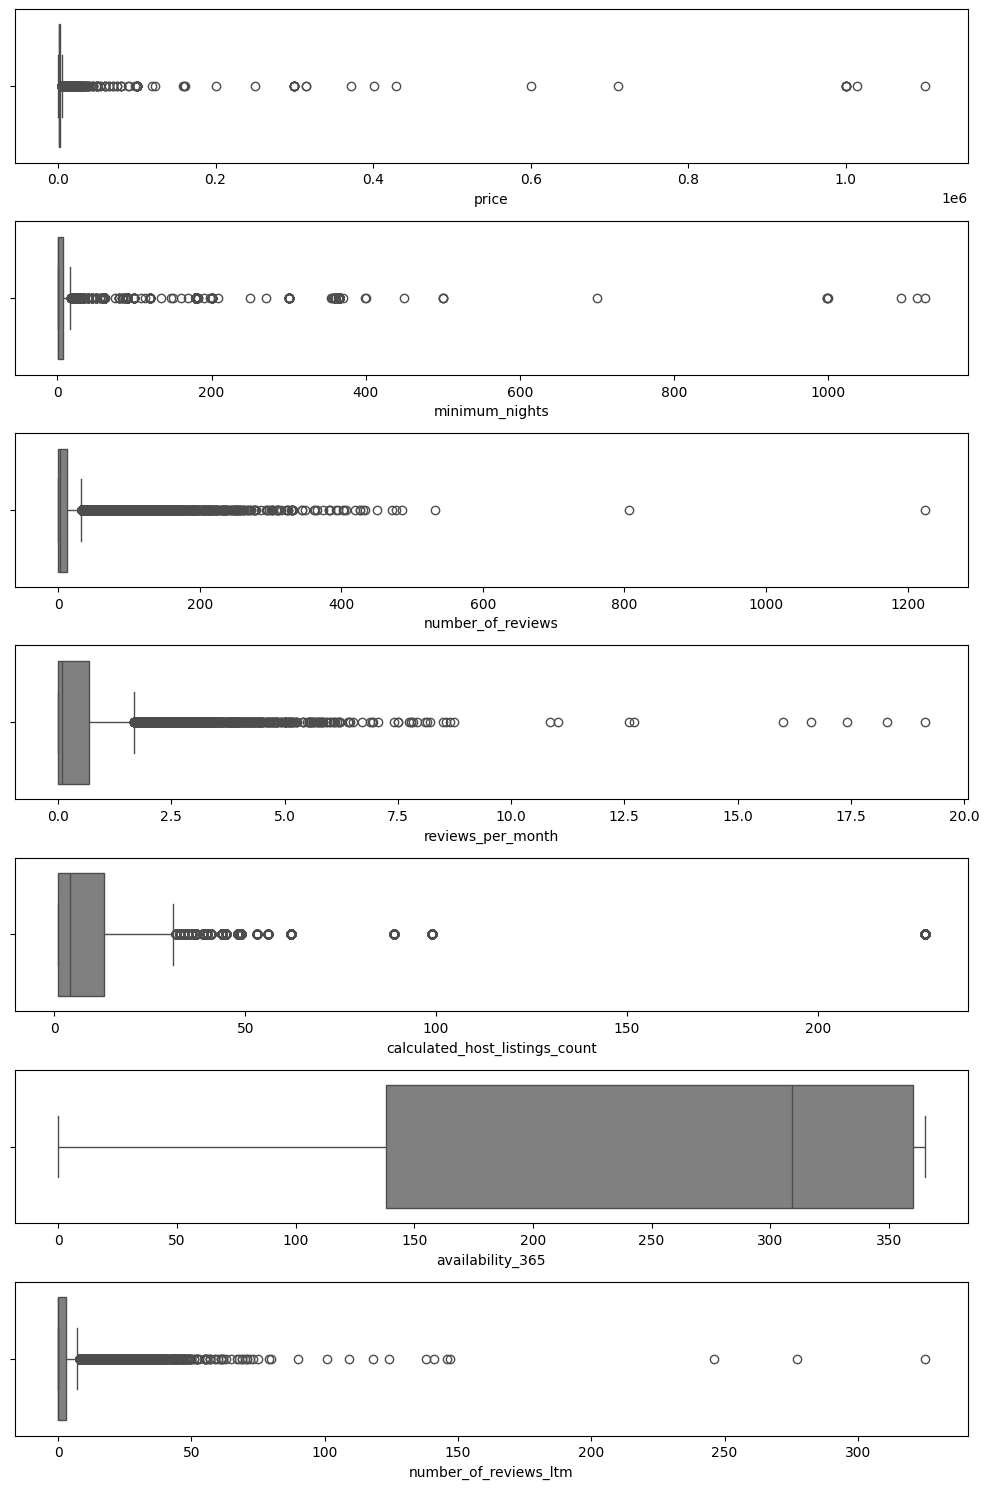

In [44]:
# show the outliers using boxplot
plt.figure(figsize=(10,15))
for index, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, index+1)
    sns.boxplot(x=df[col], color = 'grey')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [45]:
# define the function to calculate outlier
def calculate_outlier_info(data, column):
    Q1 = data[column].quantile(1/4)
    Q3 = data[column].quantile(3/4)
    iqr = Q3 - Q1
    outlier_lower_limit = Q1 - 1.5 * iqr
    outlier_upper_limit = Q3 + 1.5 * iqr
    num_of_outliers = len(data[(data[column] < outlier_lower_limit) | (data[column] > outlier_upper_limit)])
    outlier_percentage = round(num_of_outliers / len(data[column]) * 100, 2)
    return num_of_outliers, outlier_percentage, outlier_lower_limit, outlier_upper_limit

outlier_summary = []
for col in numerical_columns:
    num_outliers, outlier_pct, lower_bound, upper_bound = calculate_outlier_info(df, col)
    outlier_summary.append([col, num_outliers, outlier_pct, lower_bound, upper_bound])

outlier_info_df = pd.DataFrame(outlier_summary, columns=["Field", "Number of Outliers", "Percentage of Outliers (%)", "Lower Bound", "Upper Bound"])
outlier_info_df


,Field,Number of Outliers,Percentage of Outliers (%),Lower Bound,Upper Bound
0,price,1403,8.85,-1393.500,4722.500
1,minimum_nights,3168,19.98,-8.000,16.000
2,number_of_reviews,2240,14.13,-19.500,32.500
3,reviews_per_month,1471,9.28,-1.005,1.675
4,calculated_host_listings_count,1832,11.56,-17.000,31.000
5,availability_365,0,0.00,-195.000,693.000
6,number_of_reviews_ltm,2219,14.00,-4.500,7.500


#### Insights from the outliers:

> Presence and Percentage of Outliers
- Most of numerical features in the dataset have outliers.
- The feature availability_365 has no outliers (0%).
- The feature minimum_nights has the highest percentage of outliers at 19.98%.
- Other features like number_of_reviews, price, and number_of_reviews_ltm also have notable percentages of outliers at 14.13%, 8.85%, and 14.00% respectively.

> Rationale
- Outliers provide valuable insights into the data distribution and real-world variability.
- Removing outliers might lead to biased analysis results and loss of important information.

> Impact on Analysis
- Outliers in the price column could reveal a distinct group of customers willing to pay a high amount for their stay. This information is useful for marketing and customer service.
- Keeping outliers lets you understand the data better and make more accurate predictions.
- Outliers, especially in price, can help identify distinct market segments.

> ## Final Data

In [46]:
df.to_csv("Airbnb Listing Bangkok Clean.csv", index=False)

In [47]:
df = pd.read_csv('Airbnb Listing Bangkok Clean.csv')
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,0.00,3,365,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      15853 non-null  int64  
 1   listing_name                    15853 non-null  object 
 2   host_id                         15853 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15853 non-null  object 
 5   latitude                        15853 non-null  float64
 6   longitude                       15853 non-null  float64
 7   room_type                       15853 non-null  object 
 8   price                           15853 non-null  int64  
 9   minimum_nights                  15853 non-null  int64  
 10  number_of_reviews               15853 non-null  int64  
 11  reviews_per_month               15853 non-null  float64
 12  calculated_host_listings_count  

# 3. Data Analysis

> We have done the data cleaning stage. Now, we can start doing the analysis.

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      15853 non-null  int64  
 1   listing_name                    15853 non-null  object 
 2   host_id                         15853 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15853 non-null  object 
 5   latitude                        15853 non-null  float64
 6   longitude                       15853 non-null  float64
 7   room_type                       15853 non-null  object 
 8   price                           15853 non-null  int64  
 9   minimum_nights                  15853 non-null  int64  
 10  number_of_reviews               15853 non-null  int64  
 11  reviews_per_month               15853 non-null  float64
 12  calculated_host_listings_count  

In [50]:
# show the map of airbnb in Bangkok based on neighbourhood
fig = px.scatter_mapbox(
    df, lat='latitude', lon='longitude', hover_name='listing_name', 
    hover_data=['price', 'room_type'], color='neighbourhood', zoom=10, height=600
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

## 3.1 Analysis Distribution of Airbnb Listing Locations

In [51]:
# show total listings in bangkok
print(f"Total airbnb listing in Bangkok: {df.shape[0]}")


Total airbnb listing in Bangkok: 15853


In [52]:
# show total listing per neighbourhood
listing_count_by_neighbourhood = df[['neighbourhood']].value_counts().reset_index()
listing_count_by_neighbourhood

,neighbourhood,count
0,Watthana,2152
1,Khlong Toei,2097
2,Huai Khwang,1125
3,Ratchathewi,1114
4,Bang Rak,827
5,Sathon,809
6,Phra Nakhon,619
7,Phra Khanong,558
8,Chatuchak,548
9,Bang Na,458


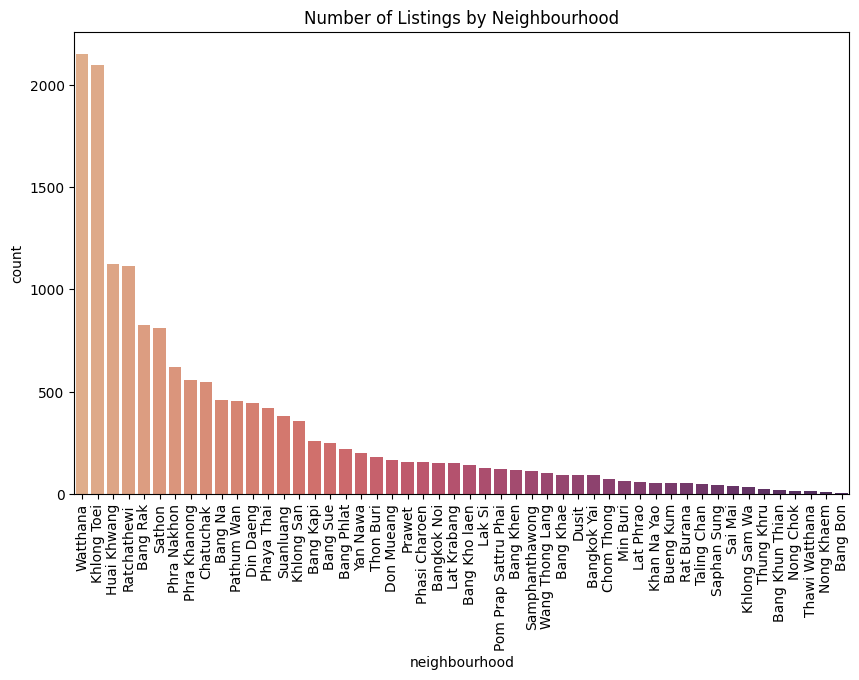

In [53]:
plt.figure(figsize=(10, 6))
sns.color_palette("flare", as_cmap=True)
order = df['neighbourhood'].value_counts().index
ax = sns.countplot(x='neighbourhood', data=df, order=order, palette='flare')
ax.set_title('Number of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

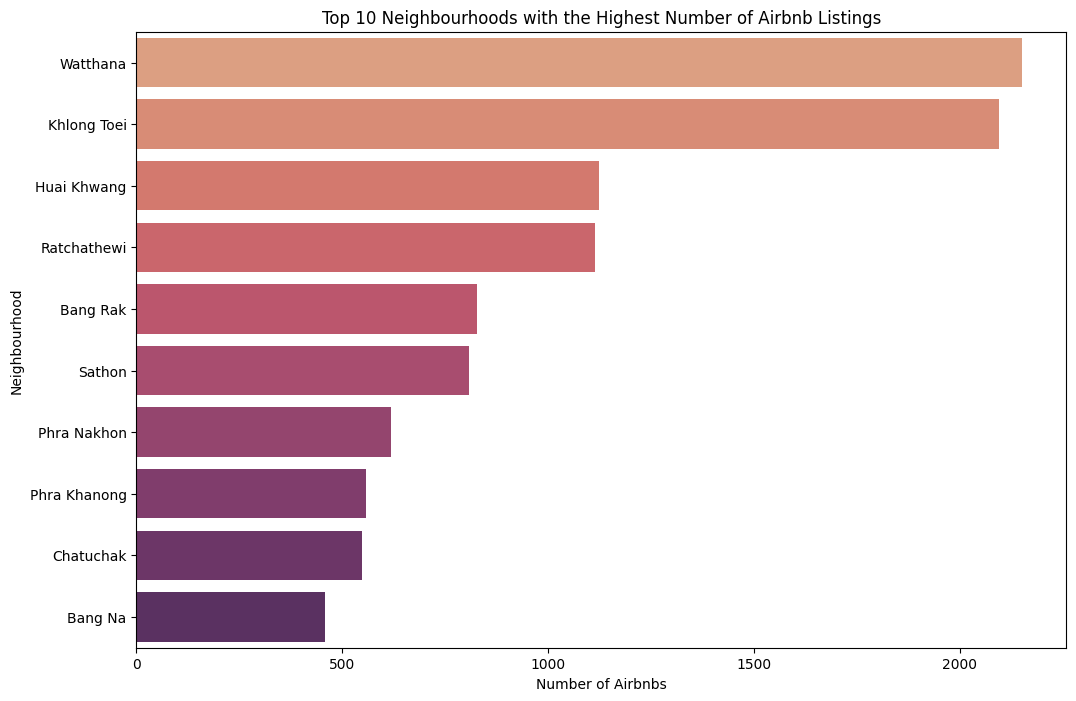

In [54]:
# Show top 10 neighborhoods by Airbnb listings
airbnb_count_neighbourhood = df['neighbourhood'].value_counts().reset_index()
airbnb_count_neighbourhood.columns = ['Neighbourhood', 'Count']
airbnb_count_neighbourhood = airbnb_count_neighbourhood.sort_values(by='Count', ascending=False)

# Select the top 10 neighborhoods
top_10_neighbourhood = airbnb_count_neighbourhood.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_neighbourhood, x='Count', y='Neighbourhood', palette='flare')
plt.title('Top 10 Neighbourhoods with the Highest Number of Airbnb Listings')
plt.xlabel('Number of Airbnbs')
plt.ylabel('Neighbourhood')
plt.show()


> ### Insight:
* Watthana and Khlong Toei are the neighborhoods with the highest number of Airbnb listings, each exceeding 2000. 

* When looking at the number of airbnb listings in Bangkok, most are spread in city center of Bangkok. Watthana, known for its bustling shopping centers like EmQuartier, Terminal 21, and Villa Plaza, is a hub of retail activity. This district also boasts a wide array of dining and entertainment options, ranging from upscale restaurants to vibrant nightlife spots. The blend of modern shopping amenities, diverse culinary choices, and entertainment venues makes Vadhana a popular destination for both tourists and locals in Bangkok.

* Furthermore, both Vadhana and Khlong Toei are well-served by public transportation, including the BTS Skyline, MRT, and Rail Line.

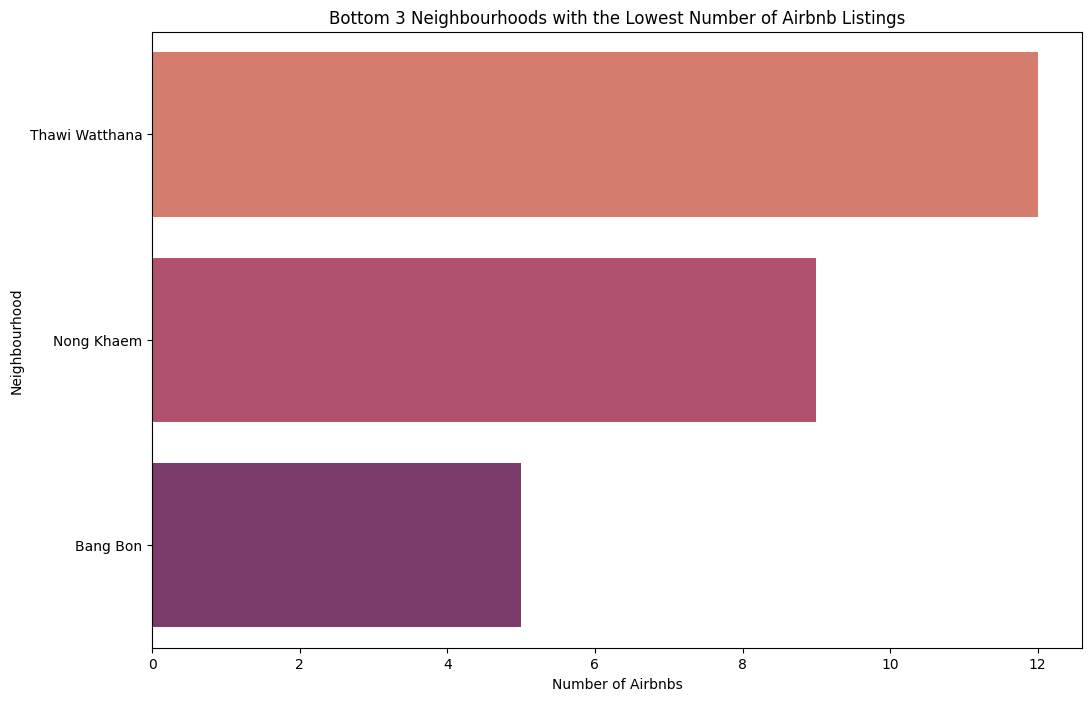

In [55]:
# Show bottom 3 neighborhoods by Airbnb listings
bottom_3_neighbourhood = airbnb_count_neighbourhood.tail(3)
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_3_neighbourhood, x='Count', y='Neighbourhood', palette='flare')
plt.title('Bottom 3 Neighbourhoods with the Lowest Number of Airbnb Listings')
plt.xlabel('Number of Airbnbs')
plt.ylabel('Neighbourhood')
plt.show()


> ### Insights:
* Thawi Watthana, Nong Khaem, and Bang Bon adalah distrik dengan jumlah listing terendah.Thawi Watthana, Nong Khaem, and Bang Bon are districts with the lowest number of Airbnb listings, each have least than 15 listings. In stark contrast, the neighborhoods with the highest number of listings, such as Vadhana and Khlong Toei, boast over 2000 listings each.

* These neighborhoods should be increased in the Airbnb listing, so that customers/visitors can have more choices in these neighborhoods.

## 3.2 Factors Influencing the Price of Airbnb Listings

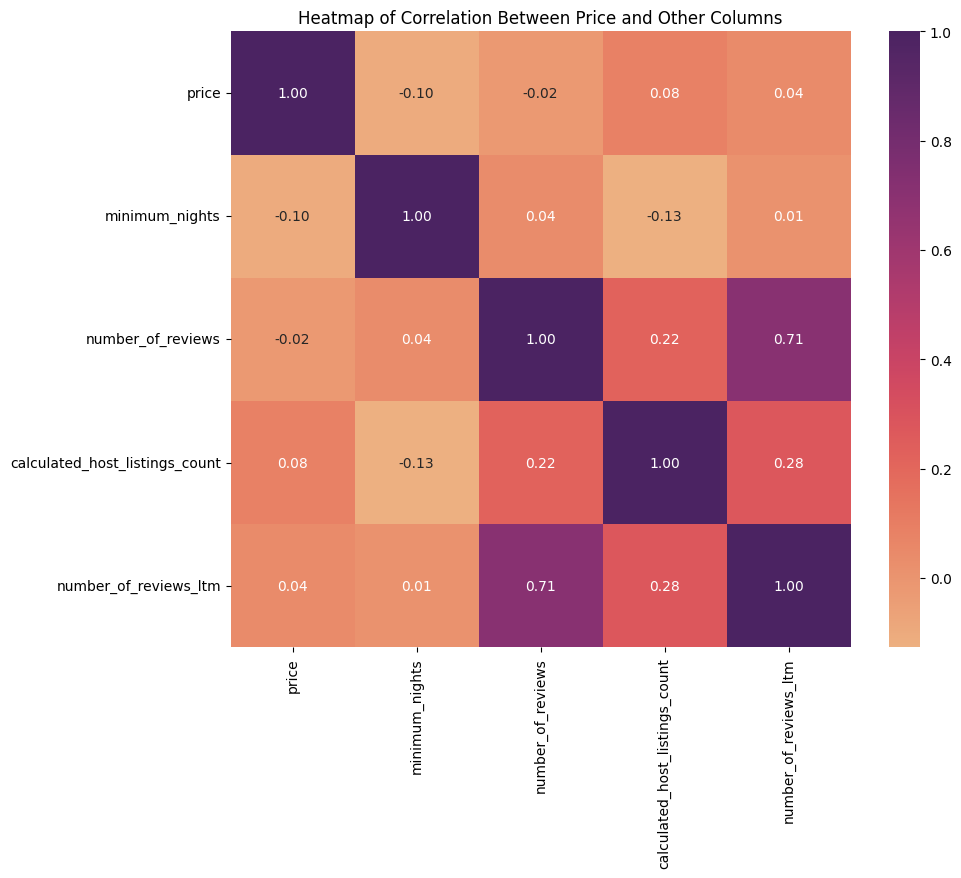

In [56]:
columns = ['minimum_nights', 'number_of_reviews', 
           'calculated_host_listings_count',
           'number_of_reviews_ltm']
corr_matrix = df[['price'] + columns].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Heatmap of Correlation Between Price and Other Columns')
plt.show()

> ### Insight:
The heatmap shows that the numerical variables have a weak correlation with Airbnb listing prices in Bangkok.
This means that the factors measured by these variables have no influence on the pricing of Airbnb listings.

In [57]:
# Descriptive Statistics for price analysis
price_info = df[['price']].agg(['min', 'max', 'median'])
price_info.style.format({'price' :'{:.2f}'})

,price
min,278.00
max,1100000.00
median,1429.00


In [58]:
# because the data distribution is not normal, using the median for pricing per neighbourhood ensures that outliers have minimal impact.
neighbourhood_med_price = df.groupby('neighbourhood')['price'].median().reset_index().rename(columns={'price': 'med_price'})
neighbourhood_med_price = neighbourhood_med_price.sort_values(by='med_price', ascending=False)
neighbourhood_med_price

,neighbourhood,med_price
27,Nong Chok,2539.0
29,Pathum Wan,2400.0
48,Watthana,2000.0
39,Samphanthawong,2000.0
8,Bang Rak,1850.0
34,Pom Prap Sattru Phai,1709.0
22,Khlong Toei,1700.0
37,Ratchathewi,1536.0
43,Taling Chan,1502.5
25,Lat Phrao,1500.0


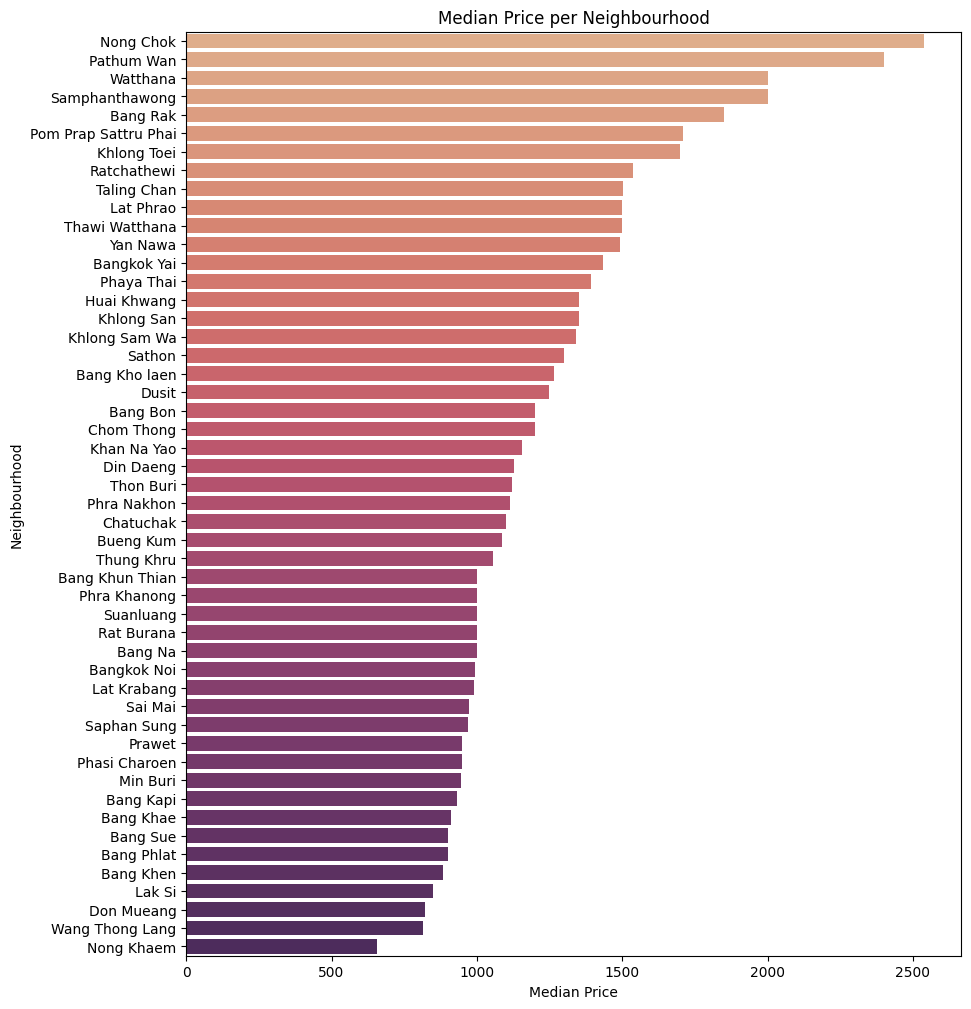

In [59]:
# Analysis price distribution per neighbourhood
plt.figure(figsize=(10, 12))
sns.barplot(data=neighbourhood_med_price, y='neighbourhood', x='med_price', palette='flare')
plt.title('Median Price per Neighbourhood')
plt.ylabel('Neighbourhood')
plt.xlabel('Median Price')
plt.show()

> ### Insight: 
From the provided data, we can gather several insights:
- Price Range: The different rental prices show that demand and amenities vary by neighborhood, showing how the Bangkok rental market is always changing.
- Lowest median price in Nong Khaem: Nong Khaem offers affordable options for budget-conscious travelers. Hosts can make themselves more competitive by offering good prices and extra services.
- Highest Median Price in Nong Chok: Nong Chok attracts luxury seekers with premium offerings. Hosts can provide upscale amenities and tailored experiences.
- Price Distribution Insights: Price differences show how important pricing is. The location and neighbourhood affect the rent, so hosts need careful pricing to get the best income.

In [60]:
# Calculate median price per room type and reset the index
room_type_price = df.groupby('room_type')['price'].median().sort_values(ascending=False).reset_index()
room_type_price

,room_type,price
0,Hotel room,1700.0
1,Entire home/apt,1536.0
2,Private room,1212.0
3,Shared room,500.0


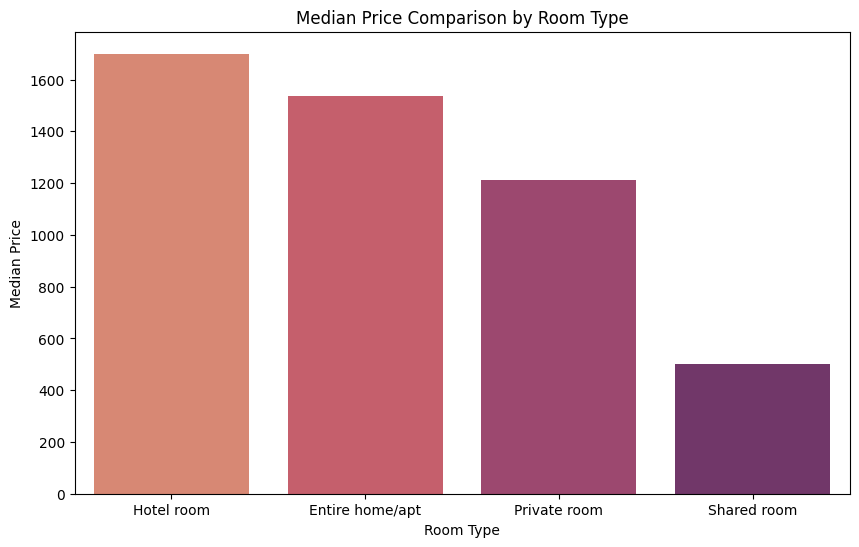

In [61]:
#  show distribution price per room type
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=room_type_price, hue='room_type', palette='flare')
plt.xlabel('Room Type')
plt.ylabel('Median Price')
plt.title('Median Price Comparison by Room Type')
plt.show()

> ### Insight: 
Based on room type, the highest median price is hotel room and entire home/apt. While the cheapest is shared room.

> From the bar chart analysis, it can be concluded that Room Type (entire home/apartment, hotel room, private room, shared room) and Neighborhood affect the price of Airbnb properties in Bangkok.

> This influence can be seen from the average price difference between different Room Types and Neighborhoods. For example, hotel room prices tend to be higher in areas close to the city center. This suggests that location and room type play an important role in determining the price of Airbnb properties in Bangkok.

## 3.3 The Preferences of Room Type

In [62]:
# Show the distribution per room type
room_type_counts = df['room_type'].value_counts()
room_type_counts.reset_index()

,room_type,count
0,Entire home/apt,8912
1,Private room,5770
2,Hotel room,648
3,Shared room,523


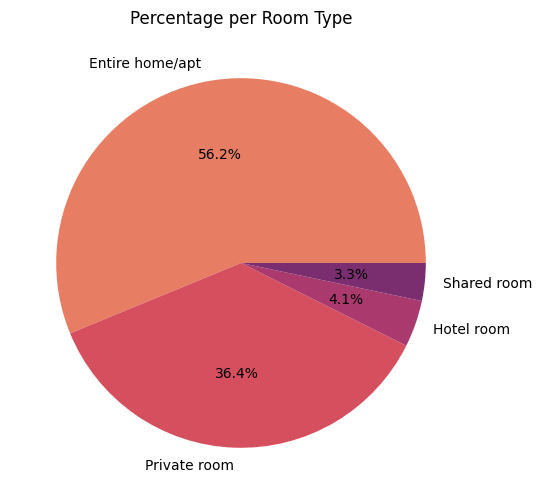

In [63]:
# show room type percentages
room_type_percentages = room_type_counts / len(df) * 100
colors = sns.color_palette('flare', len(room_type_percentages))
plt.figure(figsize=(10, 6))
plt.pie(room_type_percentages, labels=room_type_percentages.index, autopct='%1.1f%%', colors=colors)
plt.title('Percentage per Room Type')
plt.show()

> ### Insight:
1. Entire home/apt room type is the dominant choice, accounting for around 56% of the total 8912 Airbnb listings in Bangkok. This shows that the majority of Airbnb users prefer to rent out an entire house or apartment for their stay.

2. Private room type is a significant second choice, accounting for about 36% of the total listings.

3. Hotel room and “Shared room” room types have a smaller proportion, accounting for about 4.1% and 3.3% of the total listings respectively.

In [64]:
# distribution of room type per neighbourhood
cross_tab = pd.crosstab(df['neighbourhood'], df['room_type'])
cross_tab

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Bang Bon,2,0,3,0
Bang Kapi,124,1,132,3
Bang Khae,35,1,56,0
Bang Khen,48,3,64,1
Bang Kho laen,93,2,45,0
Bang Khun Thian,7,0,12,2
Bang Na,278,9,168,3
Bang Phlat,132,3,76,6
Bang Rak,351,67,375,34


> ### Insight:
The number of airbnb in the form of Entire home/apt and private room is more dominant in all neighborhoods. 
whereas, the number of hotel rooms and shared rooms is the least compared to other room types. 

## 3.4 Airbnb Listing Popularity Analysis

> The number_of_reviews_ltm for an Airbnb listing is the number of reviews from guests who have completed their stay in the past year. Therefore, the more reviews a listing receives, the more frequently it is booked by customers.

In [65]:
# because number_of_reviews_ltm is not normal, we use median 
median_review_ltm = df['number_of_reviews_ltm'].median()
df_neighbour_cat = df.groupby('neighbourhood')['price'].median().reset_index()

In [66]:
# categorize neighbourhood popularity
df['popularity'] = np.where(df['number_of_reviews_ltm'] > median_review_ltm, 'Popular', 'Not Popular')
df_popularity = df.groupby(['neighbourhood', 'popularity'])['price'].median().reset_index()
df_popularity.sort_values(by='price', ascending=False)

,neighbourhood,popularity,price
56,Pathum Wan,Popular,2650.0
53,Nong Chok,Not Popular,2539.0
50,Lat Phrao,Popular,2443.0
75,Samphanthawong,Not Popular,2229.0
92,Watthana,Not Popular,2000.0
...,...,...,...
91,Wang Thong Lang,Popular,700.0
4,Bang Khae,Popular,700.0
38,Khan Na Yao,Popular,681.0
54,Nong Khaem,Not Popular,658.0


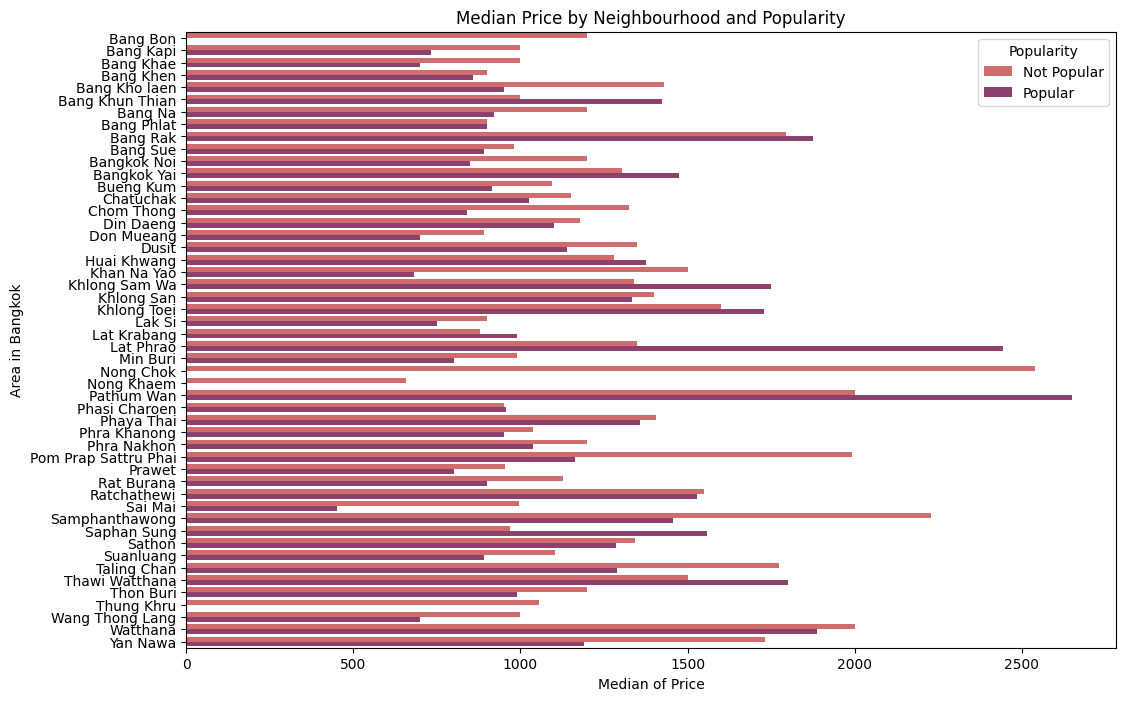

In [67]:
# Show grafik median price neighbourhood and popularity
plt.figure(figsize=(12, 8))
sns.barplot(data=df_popularity, y='neighbourhood', x='price', hue='popularity', palette='flare')
plt.title('Median Price by Neighbourhood and Popularity')
plt.ylabel('Area in Bangkok')
plt.xlabel('Median of Price')
plt.legend(title='Popularity')
plt.show()

> The barplot indicates that Airbnb listings categorized as "Popular" tend to have a lower median price compared to those categorized as "Not Popular." This is evident from the majority of listings, where the median price for popular listings is visibly lower.

## 3.5 Summary

> The majority of Airbnb properties are concentrated in Watthana and Khlong Toei neighborhoods. This shows that Airbnb properties are more popular in the city center, which is due to the presence of business centers, major tourist attractions, shopping malls, and good accessibility to public transportation.
Neighborhoods like Dusit, Bangkok Yai, and Samphangthawong have a relatively low number of Airbnbs located in the center of Bangkok. This could be an opportunity to explore and develop the market in these areas, either through increasing the number of Airbnb properties or through more intensive marketing strategies.

> The findings suggest that there is great potential for Airbnb in areas like Nong Chok that are far from the city center. This may be due to various factors, including more affordable property prices, quieter neighborhoods, and good accessibility to the city center.

> Dominance of Entire Home/Apartment and Private Room: The finding that the number of Entire home/apartment and private room Airbnb types are dominant suggests that many guests are looking for a more private and exclusive stay in the area.

## 3.6  Actionable Recommendations


> Marketing Team:
1. Area-Based Marketing: As the data analysis shows that price influences neighbourhoods, the marketing team can develop customized marketing campaigns for each district, emphasizing the unique advantages and attractions of each area.

2. Pricing Strategy Adjustment: The highest median price is in the suburban area of Nong Chok Neighborhood. Therefore, the marketing team should direct their pricing strategy to match the market preferences in that area. They should review rental rates to ensure that Airbnb prices in suburban areas remain competitive and attractive to potential renters.

3. Market Segmentation: Prices in Nong Chok tend to be higher due to the larger properties. Therefore, the marketing team should do more detailed market segmentation. The marketing team can target customers who are looking for a more exclusive and comfortable stay, such as large families or travel groups.

> Business Team:
1. Increase the number of “Hotel room” and “Shared room” type offerings on the Airbnb platform. with certain quality standards, such as hotel facilities and hospitality services.
2. Investment in Facilities and Services: The Airbnb Business Team needs to encourage investment from hosts in improving property quality and amenities as well as offering additional services to increase guest appeal and satisfaction. 
3. Local Partnership Development: Airbnb Business Team can strengthen partnerships with local businesses such as restaurants, entertainment venues, and tourist attractions to increase added value for guests and expand their business network. This can also help promote local tourism and support the local economy.